In [1]:
import pandas_datareader as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

df = pdr.get_data_yahoo('INFY', start='2001-10-01', end='2023-08-06')

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-10-01,1.070938,1.070938,0.990313,1.037500,0.695814,2073600
2001-10-02,1.015938,1.093750,1.008125,1.093750,0.733539,966400
2001-10-03,1.018750,1.120313,1.018750,1.071875,0.718869,8710400
2001-10-04,1.124688,1.175000,1.072188,1.140625,0.764977,5382400
2001-10-05,1.125000,1.218438,1.125000,1.169063,0.784049,3206400


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-31,16.620001,16.750000,16.600000,16.660000,16.660000,6604000
2023-08-01,16.719999,16.840000,16.650000,16.799999,16.799999,7462200
2023-08-02,16.540001,16.600000,16.430000,16.520000,16.520000,11896400
2023-08-03,16.520000,16.559999,16.440001,16.510000,16.510000,10134400
2023-08-04,16.680000,16.879999,16.639999,16.709999,16.709999,7012200


In [10]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2001-10-01,1.070938,1.070938,0.990313,1.037500,0.695814,2073600
1,1,2001-10-02,1.015938,1.093750,1.008125,1.093750,0.733539,966400
2,2,2001-10-03,1.018750,1.120313,1.018750,1.071875,0.718869,8710400
3,3,2001-10-04,1.124688,1.175000,1.072188,1.140625,0.764977,5382400
4,4,2001-10-05,1.125000,1.218438,1.125000,1.169063,0.784049,3206400


In [11]:
df = df.drop(['index','Date','Adj Close'], axis=1)

In [29]:
df.head()

,Open,High,Low,Close,Volume
0,1.640625,1.656250,1.588750,1.628438,2163200
1,1.584375,1.718750,1.532813,1.690625,5516800
2,1.643750,1.696563,1.629688,1.651563,2428800
3,1.630938,1.631250,1.531563,1.541563,4195200
4,1.532188,1.537500,1.475313,1.493750,3686400


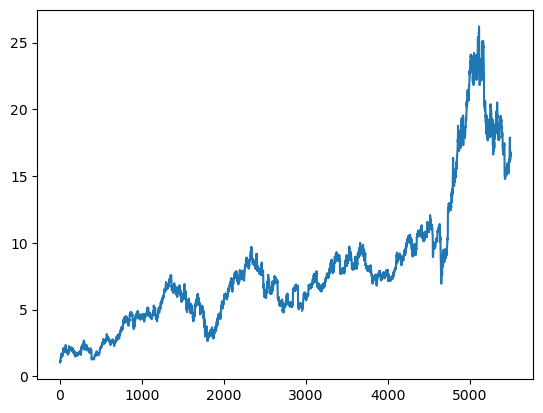

In [12]:
plt.plot(df.Close)

In [13]:
df

,Open,High,Low,Close,Volume
0,1.070938,1.070938,0.990313,1.037500,2073600
1,1.015938,1.093750,1.008125,1.093750,966400
2,1.018750,1.120313,1.018750,1.071875,8710400
3,1.124688,1.175000,1.072188,1.140625,5382400
4,1.125000,1.218438,1.125000,1.169063,3206400
...,...,...,...,...,...
5494,16.620001,16.750000,16.600000,16.660000,6604000
5495,16.719999,16.840000,16.650000,16.799999,7462200
5496,16.540001,16.600000,16.430000,16.520000,11896400
5497,16.520000,16.559999,16.440001,16.510000,10134400


In [14]:
ma100 = df.Close.rolling(100).mean()

In [15]:
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
5494    16.0904
5495    16.0768
5496    16.0648
5497    16.0531
5498    16.0475
Name: Close, Length: 5499, dtype: float64

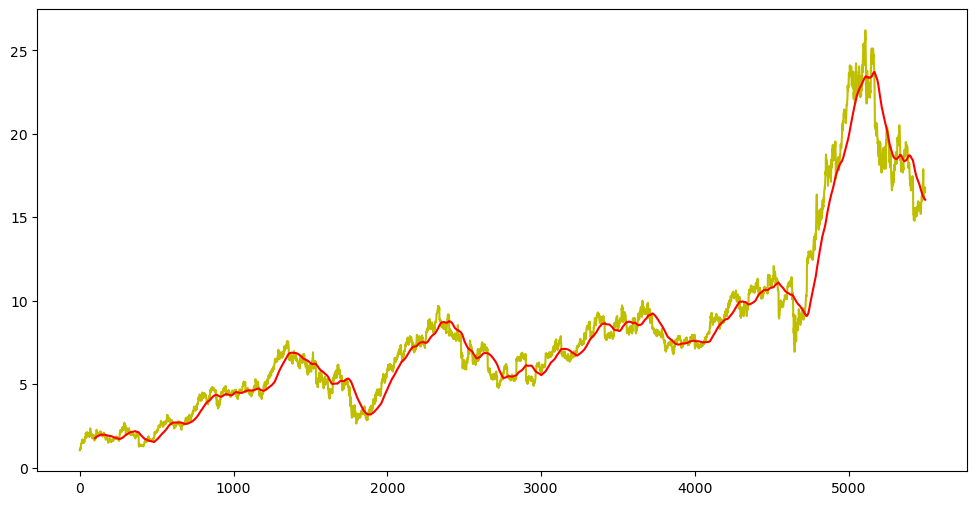

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,'y')
plt.plot(ma100,'r')

In [18]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5494    17.39630
5495    17.39480
5496    17.38715
5497    17.38065
5498    17.37340
Name: Close, Length: 5499, dtype: float64

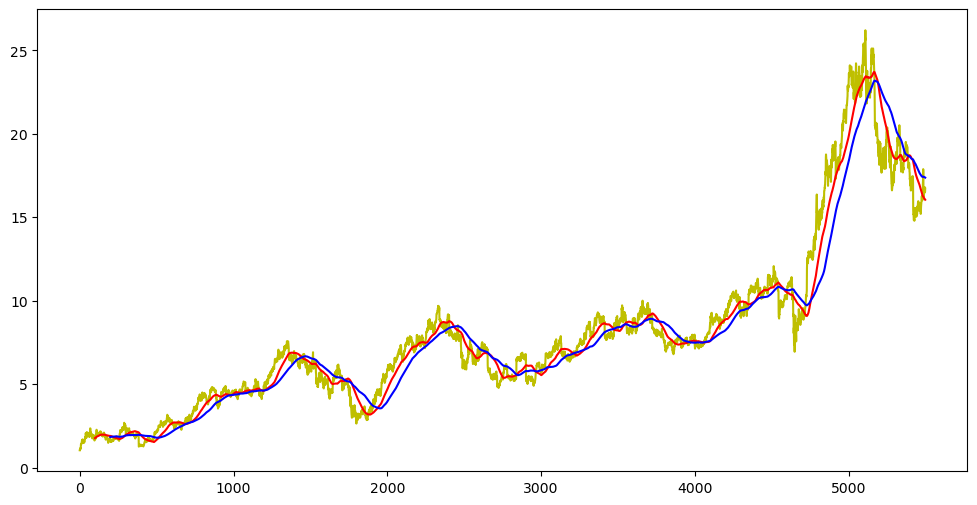

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,'y')
plt.plot(ma100,'r')
plt.plot(ma200,'b')

In [20]:
df.shape

(5499, 5)

In [53]:
#spliting data into training and testing

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(3849, 1)
(1650, 1)


In [54]:
data_train.head()

,Close
0,1.037500
1,1.093750
2,1.071875
3,1.140625
4,1.169063


In [55]:
data_test.head()

,Close
3849,7.250
3850,7.245
3851,7.220
3852,7.195
3853,7.180


In [56]:
#normalization of data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [57]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.        ],
       [0.00627615],
       [0.00383542],
       ...,
       [0.7087866 ],
       [0.73165967],
       [0.73500697]])

In [58]:
data_train_array.shape

(3849, 1)

In [62]:
x_train = []
y_train = []

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)

In [63]:
x_train.shape

(3749, 100, 1)

In [64]:
x_train

array([[[0.        ],
        [0.00627615],
        [0.00383542],
        ...,
        [0.07182705],
        [0.0740935 ],
        [0.08211302]],

       [[0.00627615],
        [0.00383542],
        [0.01150627],
        ...,
        [0.0740935 ],
        [0.08211302],
        [0.08716876]],

       [[0.00383542],
        [0.01150627],
        [0.01467927],
        ...,
        [0.08211302],
        [0.08716876],
        [0.08375175]],

       ...,

       [[0.77238494],
        [0.77015342],
        [0.77126916],
        ...,
        [0.72217576],
        [0.71101811],
        [0.71882845]],

       [[0.77015342],
        [0.77126916],
        [0.76569039],
        ...,
        [0.71101811],
        [0.71882845],
        [0.7087866 ]],

       [[0.77126916],
        [0.76569039],
        [0.80697355],
        ...,
        [0.71882845],
        [0.7087866 ],
        [0.73165967]]])

In [30]:
#ML Model

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [124]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [125]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [126]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs =100)

Epoch 1/100
118/118 [==============================] - 20s 136ms/step - loss: 0.0418
Epoch 2/100
118/118 [==============================] - 16s 133ms/step - loss: 0.0108
Epoch 3/100
118/118 [==============================] - 16s 138ms/step - loss: 0.0095
Epoch 4/100
118/118 [==============================] - 17s 140ms/step - loss: 0.0092
Epoch 5/100
118/118 [==============================] - 16s 138ms/step - loss: 0.0077
Epoch 6/100
118/118 [==============================] - 17s 141ms/step - loss: 0.0075
Epoch 7/100
118/118 [==============================] - 16s 139ms/step - loss: 0.0073
Epoch 8/100
118/118 [==============================] - 17s 145ms/step - loss: 0.0068
Epoch 9/100
118/118 [==============================] - 17s 143ms/step - loss: 0.0059
Epoch 10/100
118/118 [==============================] - 17s 144ms/step - loss: 0.0061
Epoch 11/100
118/118 [==============================] - 17s 146ms/step - loss: 0.0056
Epoch 12/100
118/118 [==============================] - 17s 145

118/118 [==============================] - 16s 138ms/step - loss: 0.0019
Epoch 97/100
118/118 [==============================] - 16s 137ms/step - loss: 0.0019
Epoch 98/100
118/118 [==============================] - 17s 140ms/step - loss: 0.0019
Epoch 99/100
118/118 [==============================] - 16s 138ms/step - loss: 0.0019
Epoch 100/100
118/118 [==============================] - 16s 136ms/step - loss: 0.0019


In [127]:
model.save('keras_model.keras')

In [128]:
past_100_days = data_train.tail(100)

In [129]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [130]:
final_df.head()

,Close
0,7.900
1,8.270
2,8.195
3,8.025
4,7.950


In [131]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05694409],
       [0.07601135],
       [0.07214633],
       ...,
       [0.5011595 ],
       [0.50064415],
       [0.51095072]])

In [132]:
input_data.shape

(1750, 1)

In [133]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test),np.array(y_test)

In [134]:
print(x_test.shape)

(1650, 100, 1)


In [135]:
print(y_test.shape)

(1650,)


In [136]:
#MAking prediction

In [137]:
y_predict = model.predict(x_test)

52/52 [==============================] - 2s 36ms/step


In [138]:
y_predict = np.array(y_predict)

In [139]:
y_predict.shape

(1650, 1)

In [140]:
y_test.shape

(1650,)

In [141]:
scaler.scale_

array([0.05153311])

In [142]:
scale_factor = 1/0.05153311
y_predict = y_predict*scale_factor
y_test = y_test*scale_factor

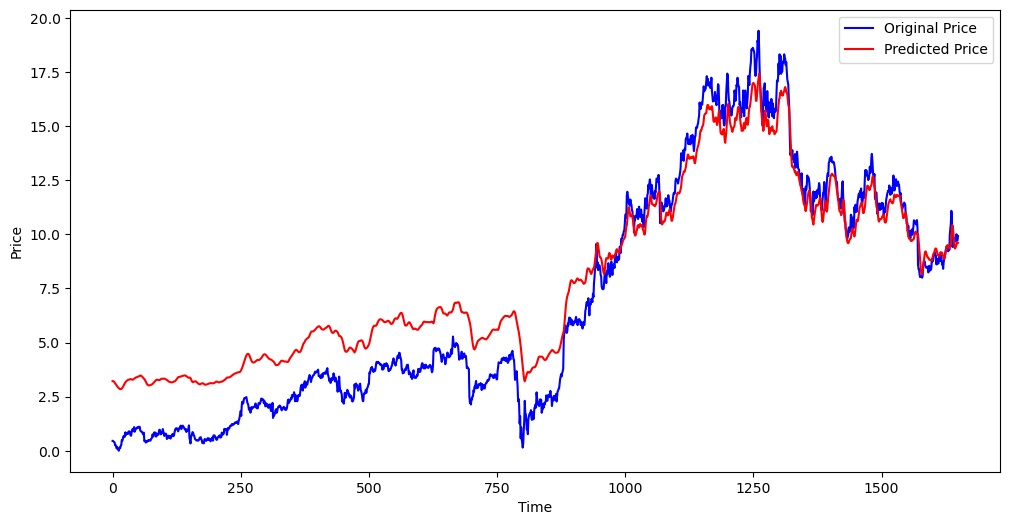

In [143]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' ,label='Original Price')
plt.plot(y_predict, 'r' ,label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()